Your Goal: Your goal is to predict rainfall for each day of the year.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

EDA

In [45]:
df= pd.read_csv("train.csv")

In [67]:
test_df= pd.read_csv("test.csv")

In [4]:
df.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [5]:
df.describe()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [6]:
df.shape

(2190, 13)

In [131]:
df.isna().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [132]:
df.isnull().sum().sort_values(ascending=False)

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

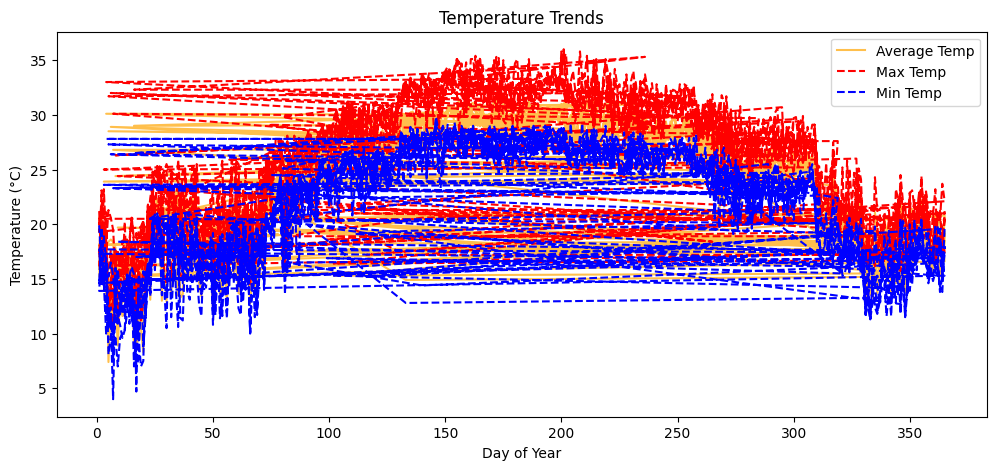

In [133]:
plt.figure(figsize=(12,5))
plt.plot(df['day'], df['temparature'], label='Average Temp', color='orange', alpha=0.7)
plt.plot(df['day'], df['maxtemp'], label='Max Temp', color='red', linestyle="dashed")
plt.plot(df['day'], df['mintemp'], label='Min Temp', color='blue', linestyle="dashed")
plt.xlabel("Day of Year")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Trends")
plt.legend()
plt.show()

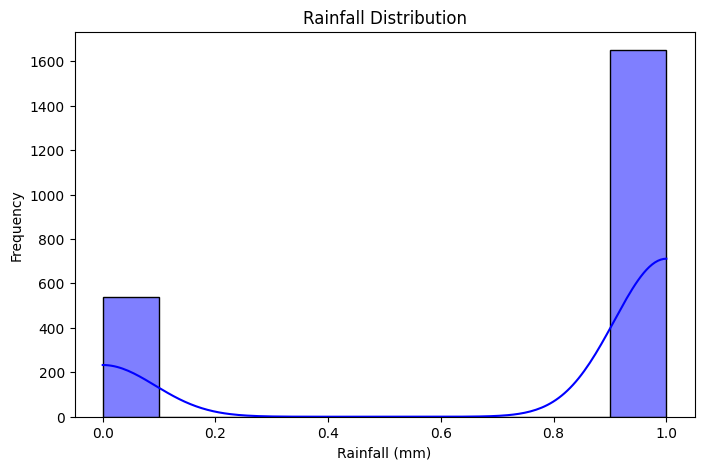

In [134]:
plt.figure(figsize=(8,5))
sns.histplot(df['rainfall'], bins=10, kde=True, color='blue')
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency")
plt.title("Rainfall Distribution")
plt.show()

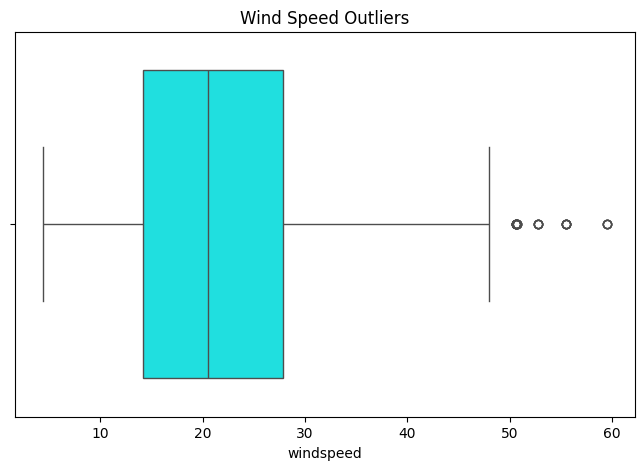

In [135]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['windspeed'], color='cyan')
plt.title("Wind Speed Outliers")
plt.show()

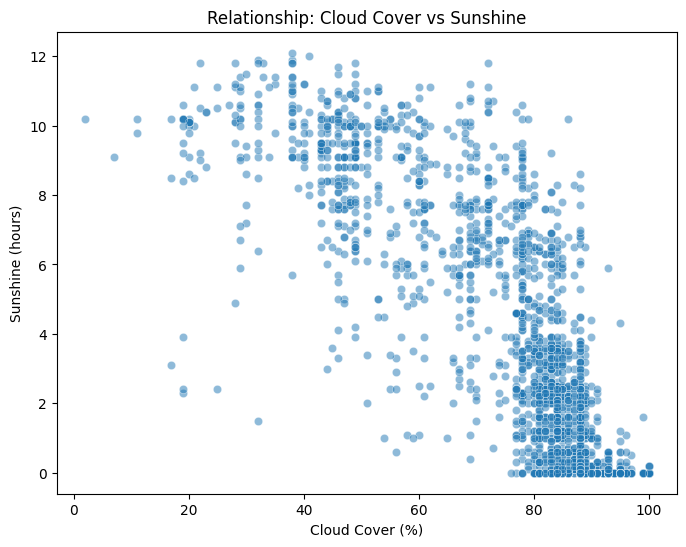

In [136]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['cloud'], y=df['sunshine'], alpha=0.5)
plt.xlabel("Cloud Cover (%)")
plt.ylabel("Sunshine (hours)")
plt.title("Relationship: Cloud Cover vs Sunshine")
plt.show()

C:\Users\Vidushi\AppData\Local\Temp\ipykernel_13920\2245376069.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='winddirection', data=df, palette="Set2")


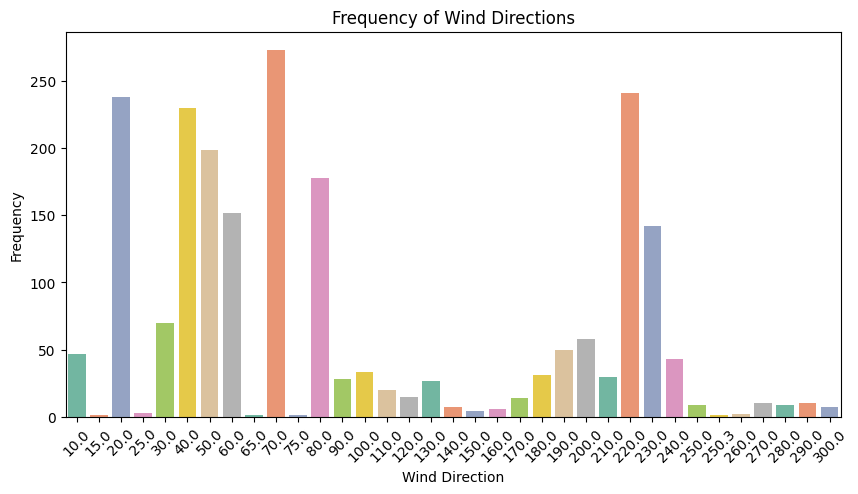

In [137]:
plt.figure(figsize=(10, 5))
sns.countplot(x='winddirection', data=df, palette="Set2")

# Title and labels
plt.title("Frequency of Wind Directions")
plt.xlabel("Wind Direction")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

plt.show()

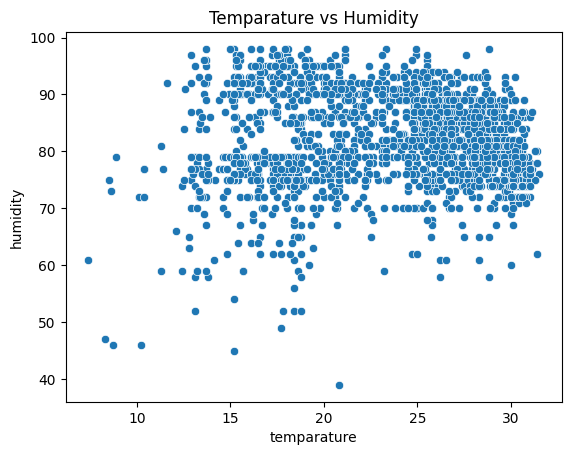

In [138]:
sns.scatterplot(x=df['temparature'], y=df['humidity'])
plt.title("Temparature vs Humidity")
plt.show()

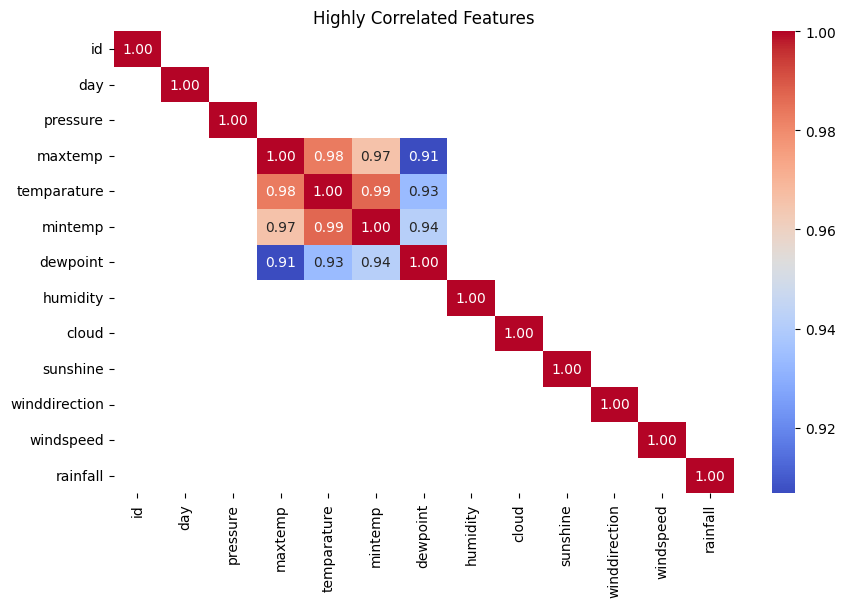

In [25]:
corr_matrix = df.corr()

# Set threshold for high correlation (e.g., 0.85)
high_corr = corr_matrix[(corr_matrix > 0.85) | (corr_matrix < -0.85)]

plt.figure(figsize=(10,6))
sns.heatmap(high_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Highly Correlated Features")
plt.show()

In [26]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

# Drop features
df= df.drop(columns=to_drop)
print("Dropped Columns:", to_drop)

Dropped Columns: ['temparature', 'mintemp', 'dewpoint']


In [62]:
test_df= test_df.drop(columns=to_drop)

In [142]:
df.head()

,id,day,pressure,maxtemp,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,52.0,45.0,3.6,40.0,24.8,0


In [47]:
X= df.drop(columns=['rainfall'])
y= df['rainfall']

In [48]:
print(X.shape)
print(y.shape)

(2190, 12)
(2190,)


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [50]:
X_train.shape

(1752, 12)

In [11]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.metrics import AUC
from keras.regularizers import l2

In [31]:
X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = np.array(X_val).reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

In [13]:
y_val.shape

(351,)

In [34]:
inputs = (X_train.shape[1], X_train.shape[2])
dropout_rate=0.3
learning_rate=0.001
batchsize=32

In [35]:
model = Sequential([
    LSTM(128, return_sequences=True, activation='tanh', recurrent_dropout=0.2, input_shape=inputs),
    Dropout(dropout_rate),
    LSTM(64, return_sequences=False, recurrent_dropout=0.2),
    Dropout(dropout_rate),
    Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001))
])

model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy', AUC()])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 9, 128)            66560     
                                                                 
 dropout_2 (Dropout)         (None, 9, 128)            0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 116,033
Trainable params: 116,033
Non-trainable params: 0
_________________________________________________________________


In [42]:
history= model.fit(X_train, y_train, validation_data= (X_val, y_val), epochs=150, batch_size=batchsize, verbose=1)

Epoch 1/150
44/44 [==============================] - 1s 25ms/step - loss: 0.2475 - accuracy: 0.9044 - auc_1: 0.9410 - val_loss: 0.4058 - val_accuracy: 0.8689 - val_auc_1: 0.8485
Epoch 2/150
44/44 [==============================] - 1s 15ms/step - loss: 0.2326 - accuracy: 0.9065 - auc_1: 0.9511 - val_loss: 0.4257 - val_accuracy: 0.8632 - val_auc_1: 0.8431
Epoch 3/150
44/44 [==============================] - 1s 24ms/step - loss: 0.2366 - accuracy: 0.8958 - auc_1: 0.9489 - val_loss: 0.4373 - val_accuracy: 0.8604 - val_auc_1: 0.8411
Epoch 4/150
44/44 [==============================] - 2s 38ms/step - loss: 0.2358 - accuracy: 0.9115 - auc_1: 0.9461 - val_loss: 0.4461 - val_accuracy: 0.8604 - val_auc_1: 0.8402
Epoch 5/150
44/44 [==============================] - 1s 24ms/step - loss: 0.2440 - accuracy: 0.9022 - auc_1: 0.9455 - val_loss: 0.4245 - val_accuracy: 0.8632 - val_auc_1: 0.8388
Epoch 6/150
44/44 [==============================] - 1s 23ms/step - loss: 0.2270 - accuracy: 0.9079 - auc_1: 0

In [43]:
loss, accuracy, auc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}, AUC: {auc:.4f}")

14/14 [==============================] - 0s 7ms/step - loss: 0.6803 - accuracy: 0.8356 - auc_1: 0.8053
Test Accuracy: 0.8356, AUC: 0.8053


In [51]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
model = CatBoostClassifier(verbose=1)  

param_grid = {
    'iterations': [100, 200, 500],  # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'depth': [4, 6, 8],  # Tree depth
    'l2_leaf_reg': [1, 3, 5],  # L2 regularization
}
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,  
    n_jobs=-1  
)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

C:\Users\Vidushi\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
4 fits failed out of a total of 243.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Vidushi\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vidushi\AppData\Roaming\Python\Python311\site-packages\catboost\core.py", line 5245, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, graph, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Us

0:	learn: 0.6693915	total: 177ms	remaining: 17.5s
1:	learn: 0.6460872	total: 202ms	remaining: 9.91s
2:	learn: 0.6240135	total: 222ms	remaining: 7.19s
3:	learn: 0.6047611	total: 234ms	remaining: 5.61s
4:	learn: 0.5870657	total: 240ms	remaining: 4.55s
5:	learn: 0.5702074	total: 250ms	remaining: 3.92s
6:	learn: 0.5561095	total: 271ms	remaining: 3.59s
7:	learn: 0.5406238	total: 279ms	remaining: 3.21s
8:	learn: 0.5273011	total: 288ms	remaining: 2.91s
9:	learn: 0.5149715	total: 300ms	remaining: 2.7s
10:	learn: 0.5027243	total: 315ms	remaining: 2.55s
11:	learn: 0.4910706	total: 323ms	remaining: 2.37s
12:	learn: 0.4805724	total: 330ms	remaining: 2.21s
13:	learn: 0.4708264	total: 337ms	remaining: 2.07s
14:	learn: 0.4614031	total: 344ms	remaining: 1.95s
15:	learn: 0.4521292	total: 349ms	remaining: 1.83s
16:	learn: 0.4436133	total: 356ms	remaining: 1.74s
17:	learn: 0.4350858	total: 363ms	remaining: 1.65s
18:	learn: 0.4285423	total: 379ms	remaining: 1.62s
19:	learn: 0.4215863	total: 388ms	remainin

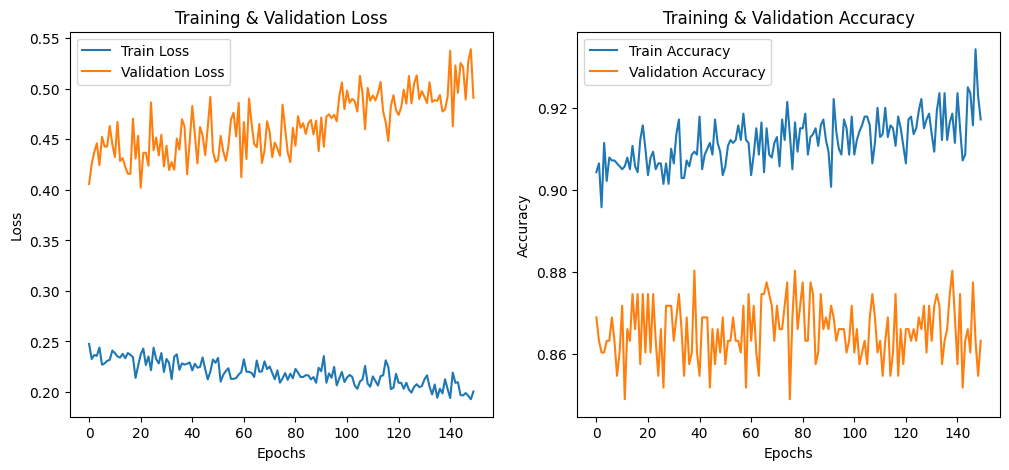

In [44]:
# loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()

In [53]:
preds= grid_search.predict(X_test)

In [54]:
y_pred_class = (preds > 0.5).astype(int)

In [55]:
y_pred_class

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = grid_search.predict_proba(X_test)[:, 1]

auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score:.4f}")

AUC Score: 0.8701


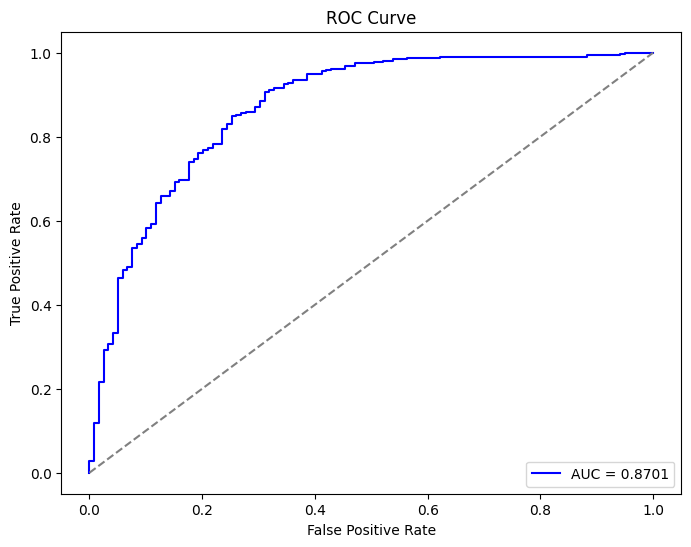

In [72]:
# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [65]:
X_train.shape

(1752, 12)

In [66]:
test_df.shape

(730, 9)

In [68]:
predicts= grid_search.predict(test_df)

In [69]:
y_pred = (predicts > 0.5).astype(int)

In [70]:
print(y_pred)

[1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [71]:
df = pd.DataFrame({'id': test_df["id"], 'rainfall': y_pred.flatten()})

df.to_csv('predictions3.csv', index=False)